In [1]:
import numpy as np
import matplotlib.pyplot as plt
from N_Level_Engine import*

In [16]:
#Define the parameters
sys_size = 4
omega1 = 1
omega2 = 3
gammaH = 0.1
gammaC = 0.1
nc = 0.1
hc_ratio = np.linspace(0.1,2,20)
nh2 = [nc*r for r in hc_ratio]
Th = [omega2/(np.log(1+1/nh)) for nh in nh2]
Tc = omega1/(np.log(1+1/nc))
p_val = 0.5
p_matrix = np.array([[1,p_val],[p_val, 1]])
gap = 0.05
detuning = 0
dstrength = 0.05

In [17]:
coh12 = []
coh13 = []
coh23 = []
for i in range(len(hc_ratio)):
    ss = getSteadyState(sys_size, omega1, omega2, gammaH, gammaC, Th[i], Tc, p_matrix, gap, detuning, dstrength)
    coh12.append(ss[1,2])
    coh13.append(ss[1,3])
    coh23.append(ss[2,3])

In [18]:
abscoh12 = [np.abs(coh) for coh in coh12]
argcoh12 = [np.mod(np.angle(coh), 2*np.pi) for coh in coh12]
abscoh13 = [np.abs(coh) for coh in coh13]
argcoh13 = [np.mod(np.angle(coh), 2*np.pi) for coh in coh13]
abscoh23 = [np.abs(coh) for coh in coh23]
argcoh23 = [np.mod(np.angle(coh), 2*np.pi) for coh in coh23]

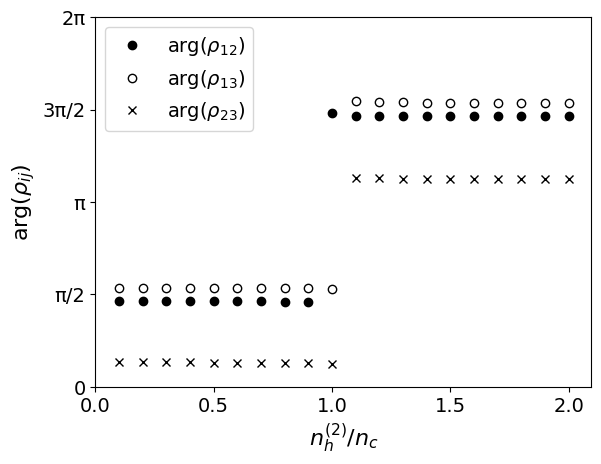

In [19]:
ax = plt.subplot()
plt.plot(hc_ratio, argcoh12,'o',color = 'black')
plt.plot(hc_ratio, argcoh13,'ko',fillstyle = 'none')
plt.plot(hc_ratio, argcoh23,'x', color = 'black')
plt.yticks([0,np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], fontsize = 14)
plt.ylim([0, 2*np.pi])
ax.set_yticklabels(['0','π/2', 'π', '3π/2', '2π'])
plt.xticks([0,0.5,1,1.5,2], fontsize = 14)
plt.legend([r'arg($\rho_{12}$)',r'arg($\rho_{13}$)', r'arg($\rho_{23}$)'], fontsize = 14)
plt.ylabel(r'arg($\rho_{ij}$)', fontsize = 16)
plt.xlabel(r'$n_h^{(2)}/n_c$',fontsize = 16)
plt.savefig('arg_coh_vs_nhnc.png',dpi=300, bbox_inches='tight')

In [20]:
with open('arg_coh12_gap0.05.txt','w') as f:
        for i in range(len(hc_ratio)):
            f.write("%s\t" % hc_ratio[i])
            f.write("%s\n" % argcoh12[i])

with open('arg_coh13_gap0.05.txt','w') as f:
        for i in range(len(hc_ratio)):
            f.write("%s\t" % hc_ratio[i])
            f.write("%s\n" % argcoh13[i])

with open('arg_coh23_gap0.05.txt','w') as f:
        for i in range(len(hc_ratio)):
            f.write("%s\t" % hc_ratio[i])
            f.write("%s\n" % argcoh23[i])

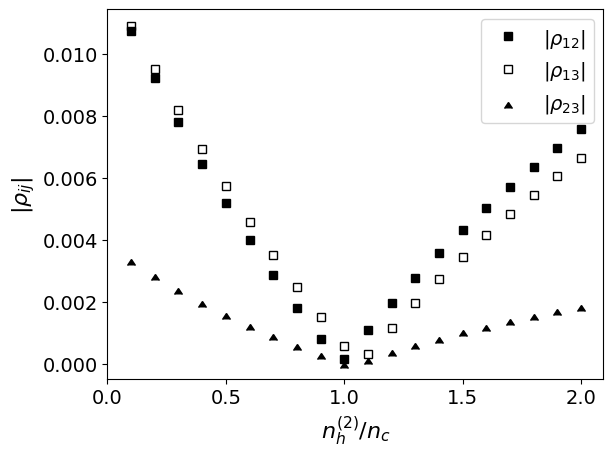

In [236]:
plt.plot(hc_ratio, abscoh12, marker = 's', color = 'black', linestyle = 'none')
plt.plot(hc_ratio, abscoh13,marker = 's', color ='black', fillstyle = 'none', linestyle = 'none')
plt.plot(hc_ratio, abscoh23, marker = 6, color = 'black', linestyle = 'none')
plt.xticks([0,0.5,1,1.5,2], fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend([r'$|\rho_{12}|$',r'$|\rho_{13}|$', r'$|\rho_{23}|$'], fontsize = 14)
plt.ylabel(r'$|\rho_{ij}|$', fontsize = 16)
plt.xlabel(r'$n_h^{(2)}/n_c$',fontsize = 16)
plt.savefig('abs_coh_vs_nhnc.png',dpi=300, bbox_inches='tight')

In [31]:
#Define the parameters
sys_size = 4
omega1 = 1
omega2 = 3
gammaH = 0.1
gammaC = 0.1
nc = 0.1
hc_ratio = 5
nh2 = nc*hc_ratio
Th = omega2/(np.log(1+1/nh2))
Tc = omega1/(np.log(1+1/nc))
p_val = np.linspace(-0.9,0.9,19)
p_matrix = [np.array([[1,p],[p, 1]]) for p in p_val]
gap = 0.05
detuning = 0
dstrength = 0.05

In [32]:
coh12 = []
coh13 = []
coh23 = []
for i in range(len(p_val)):
    ss = getSteadyState(sys_size, omega1, omega2, gammaH, gammaC, Th, Tc, p_matrix[i], gap, detuning, dstrength)
    coh12.append(ss[1,2])
    coh13.append(ss[1,3])
    coh23.append(ss[2,3])

In [33]:
abscoh12 = [np.abs(coh) for coh in coh12]
argcoh12 = [np.mod(np.angle(coh), 2*np.pi) for coh in coh12]
abscoh13 = [np.abs(coh) for coh in coh13]
argcoh13 = [np.mod(np.angle(coh), 2*np.pi) for coh in coh13]
abscoh23 = [np.abs(coh) for coh in coh23]
argcoh23 = [np.mod(np.angle(coh), 2*np.pi) for coh in coh23]

Text(0.5, 0, '$p$')

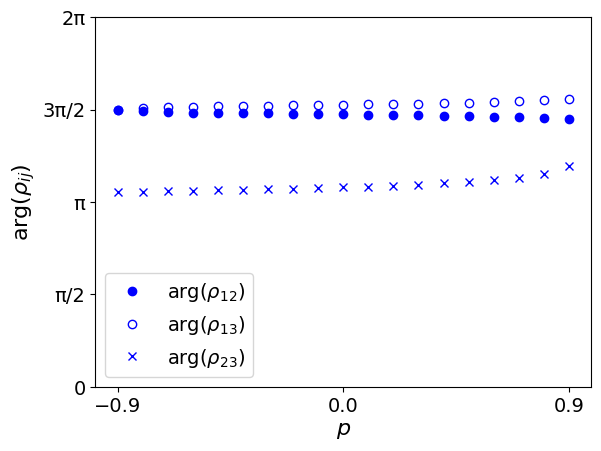

In [34]:
ax = plt.subplot()
plt.plot(p_val, argcoh12,'bo')
plt.plot(p_val, argcoh13,'bo',fillstyle = 'none')
plt.plot(p_val, argcoh23,'bx')
plt.yticks([0,np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], fontsize = 14)
plt.ylim([0, 2*np.pi])
ax.set_yticklabels(['0','π/2', 'π', '3π/2', '2π'])
plt.xticks([-0.9,0,0.9], fontsize = 14)
plt.legend([r'arg($\rho_{12}$)',r'arg($\rho_{13}$)', r'arg($\rho_{23}$)'], fontsize = 14)
plt.ylabel(r'arg($\rho_{ij}$)', fontsize = 16)
plt.xlabel(r'$p$',fontsize = 16)
#plt.savefig('arg_coh_vs_p_ref.png',dpi=300, bbox_inches='tight')

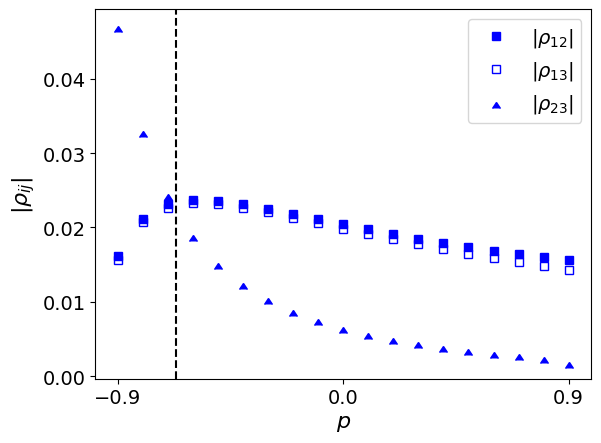

In [30]:
plt.plot(p_val, abscoh12,'bs')
plt.plot(p_val, abscoh13,'bs', fillstyle = 'none', linestyle = 'none')
plt.plot(p_val, abscoh23, marker = 6, linestyle = 'none', color = 'b')
plt.axvline(x = -2/3, linestyle = '--', color = 'black')
plt.xticks([-0.9,0,0.9], fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend([r'$|\rho_{12}|$',r'$|\rho_{13}|$', r'$|\rho_{23}|$'], fontsize = 14)
plt.ylabel(r'$|\rho_{ij}|$', fontsize = 16)
plt.xlabel(r'$p$',fontsize = 16)
#plt.savefig('abs_coh_vs_p_ref.png',dpi=300, bbox_inches='tight')

In [35]:
with open('norm_coh12_vs_p.txt','w') as f:
        for i in range(len(p_val)):
            f.write("%s\t" % p_val[i])
            f.write("%s\n" % abscoh12[i])

with open('norm_coh13_vs_p.txt','w') as f:
        for i in range(len(p_val)):
            f.write("%s\t" % p_val[i])
            f.write("%s\n" % abscoh13[i])

with open('norm_coh23_vs_p.txt','w') as f:
        for i in range(len(p_val)):
            f.write("%s\t" %p_val[i])
            f.write("%s\n" % abscoh23[i])